In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 데이터 불러오기
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [8]:
data.shape
# 8124개의 데이터
# 입력특성(22개) + 정답(1개)

(8124, 23)

In [12]:
# 데이터 정보 확인
data.info()

# 1. 결측치 여부 확인 -> 결측치 없음
# 2. 데이터 타입 확인 -> object(문자열)
#    - 사이킷런의 알고리즘은 문자열 값을 입력값으로 받지 않음 -> 수치 형태로 변경(인코딩)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 문제와 정답으로 분리
- 문제 데이터 X (특성, 속성, 피처, 독립변수): poisonous를 제외한 모든 다른 컬럼
- 정답 데이터 y (정답, 라벨, 레이블, 타겟, 종속변수): poisonous

In [41]:
# X = data.drop('poisonous', axis=1)
# X = data.iloc[:, 2:]
X = data.loc[:, 'cap-shape':]
y = data.loc[:, 'poisonous']

In [43]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [45]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

### 데이터 전처리
- 문자열 데이터 -> 수치형(인코딩, encoding)

In [48]:
y.value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [50]:
# 기술통계량 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [56]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [58]:
# one hot 인코딩: 값의 크고 작음에 의미가 없을 때 사용(상하관계가 없을 때)
X_one_hot = pd.get_dummies(X, dtype='int64')
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### train, test 데이터 분리

In [70]:
# 분리 비율 7:3, 고정규칙(random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                    test_size=0.3,
                                                    random_state=21)

In [72]:
# 분리 후 데이터의 크기(형태) 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5686, 117) (5686,)
(2438, 117) (2438,)


### 모델링
1. 모델객체 생성
2. 모델 학습
3. 모델 평가

In [75]:
# 모델 객체 생성/하이퍼파라미터 조정 안해봄
tree_model = DecisionTreeClassifier()

In [79]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
# 모델 평가
tree_model.score(X_test, y_test)
# 정확도가 1.0 -> 정확도 100%

1.0

### 하이퍼파라미터 조절한 모델링

In [91]:
# 모델 객체 생성
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [93]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [95]:
tree_model2.score(X_test, y_test)

0.9868744872846595

In [ ]:
# 우리가 보유한 데이터는 한정적: 데이터가 많을 수록 과대적합을 제어할 수 있는데
# 데이터 수의 변화 없이 여러번의 검증할 방법은 없을까?
# -> 교차 검증: 보유한 데이터를 여러번 활용해서 검증하여 성능을 확인
# 일반화 정도를 확인

In [97]:
# 교차 검증 도구 불러오기
from sklearn.model_selection import cross_val_score

In [99]:
# cross_val_score(모델, 훈련용 문제, 훈련용 정답, cv=교차검증횟수)
cross_val_score(tree_model, X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [101]:
cross_val_score(tree_model2, X_train, y_train, cv=5)

array([0.98242531, 0.98504837, 0.98240985, 0.98328936, 0.9876869 ])

### 트리모델 내부 시각화
- 외부 라이브러리인 graphviz 설치

In [106]:
# 외부 라이브러리 설치
!pip install graphviz

# graph 경로 설정
import os

os.environ['PATH'] += os.pathsep + '/opt/homebrew/bin'

In [108]:
# 현재 우리가 만든 모델을 dot형태의 파일로 내보내기
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model, # 모델
    out_file='data/tree.dot', # 저장할 경로/파일명.확장자
    class_names=['독', '식용'], # 정답데이터의 이름 설정
    feature_names=X_one_hot.columns, # one hot 인코딩 된 컬럼 이름으로 특성 넣어주기
    filled=True, # 각 노드들의 클래스가 구분되도록 색을 칠해주느냐
    impurity=True # 지니 불순도 출력 여부
)

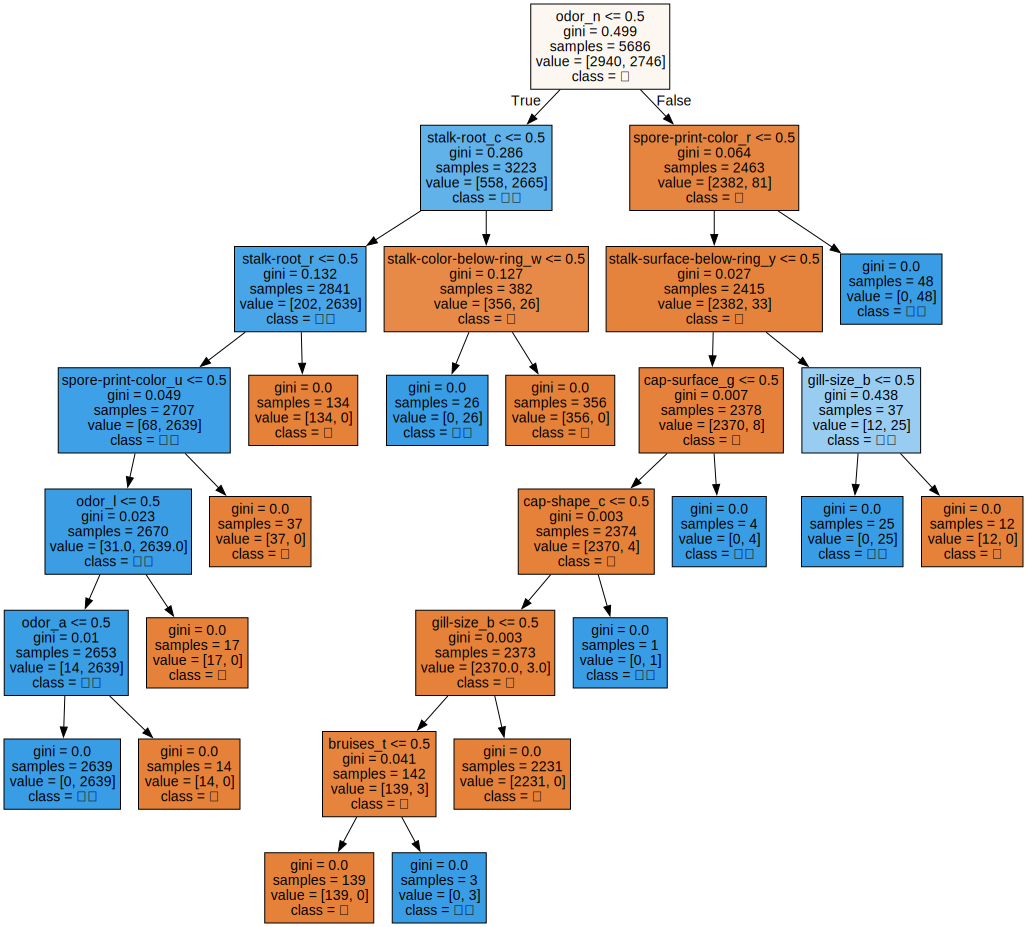

In [110]:
# dot파일을 불러와서 실제 그래프로 표현하기
import graphviz

# 클래스 이름을 한글로 부여했기 때문에, 한글 인코딩 작업 진행
with open('data/tree.dot', encoding='UTF-8') as f:
    dot_graph = f.read()

# 그래프륾 출력
graphviz.Source(dot_graph)

In [112]:
export_graphviz(
    tree_model2, # 모델
    out_file='data/tree.dot', # 저장할 경로/파일명.확장자
    class_names=['독', '식용'], # 정답데이터의 이름 설정
    feature_names=X_one_hot.columns, # one hot 인코딩 된 컬럼 이름으로 특성 넣어주기
    filled=True, # 각 노드들의 클래스가 구분되도록 색을 칠해주느냐
    impurity=True # 지니 불순도 출력 여부
)

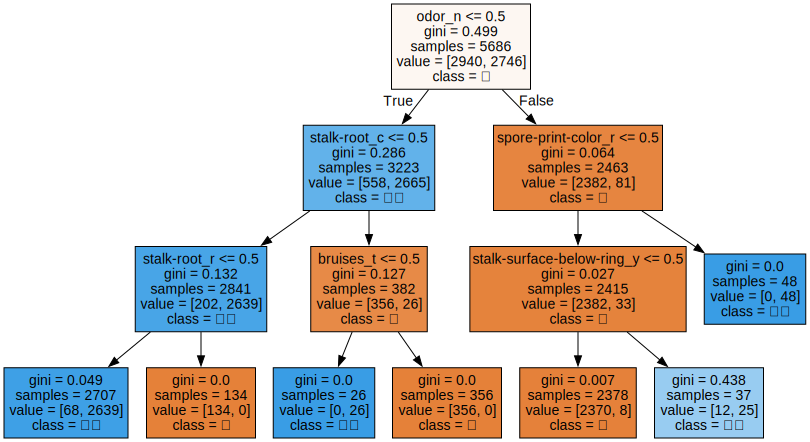

In [114]:
# dot파일을 불러와서 실제 그래프로 표현하기
import graphviz

# 클래스 이름을 한글로 부여했기 때문에, 한글 인코딩 작업 진행
with open('data/tree.dot', encoding='UTF-8') as f:
    dot_graph = f.read()

# 그래프륾 출력
graphviz.Source(dot_graph)

### 특성 선택
- 각 특성들의 중요도를 출력해보자
- 정답에 얼마만큼의 영향을 미치는 특성인가를 수치로 확인이 가능
- 각 특성들의 중요도는 0~1 사이의 값을 가짐
- 모든 특성들의 중요도 합은 1
- tree 모델은 특성의 중요도가 가장 높은 값을 상위 질문(root node)으로 배치

In [117]:
# tree model의 특성 중요도 확인
fi = tree_model.feature_importances_
fi

array([0.        , 0.00070223, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.002803  , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00206827, 0.0098082 , 0.        , 0.        ,
       0.01177167, 0.        , 0.61986752, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00575253, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17574119, 0.        ,
       0.08546397, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01159836, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [121]:
pd.set_option('display.max_rows', None)
# 판다스 디스클레이 옵션 변경(행 다보이게)

In [123]:
# 중요도를 DF화
fi_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])
fi_df

,특성중요도
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
cap-surface_f,0.000000
cap-surface_g,0.002803
cap-surface_s,0.000000
cap-surface_y,0.000000


In [131]:
# 특성 중요도를 확인하기 위해 내림차순으로 정렬
fi_df.sort_values(by='특성중요도', ascending=False)

,특성중요도
odor_n,0.619868
stalk-root_c,0.175741
stalk-root_r,0.085464
spore-print-color_r,0.032248
spore-print-color_u,0.025110
stalk-color-below-ring_w,0.017065
odor_l,0.011772
stalk-surface-below-ring_y,0.011598
odor_a,0.009808
gill-size_b,0.005753


### 정리
- tree 모델 내부 시각화 표를 보면, 중요도가 높은 특성인 odor_n이 최상단 질문으로 배치되어 있음
- 중요도가 높은 컬럼을 가장 먼저 고려해야 함(불순도가 낮아지는 방향으로 학습)
- 현재 mushroom 데이터는 하나의 특성이 60%가 넘는 중요도를 가지기 때문에 모델 학습이 용이함